# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

temp_units = "imperial"

query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temp_units}&q="


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
second_city = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            second_city.append(city)
        else:
            count_one += 1
            second_city.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | bekwai
Processing Record 5 of Set 1 | lebu
Processing Record 6 of Set 1 | goure
Processing Record 7 of Set 1 | celestun
Processing Record 8 of Set 1 | cape town
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | salalah
Processing Record 11 of Set 1 | dera bugti
City not found. Skipping...
City not found. Skipping...
Processing Record 12 of Set 1 | chodavaram
City not found. Skipping...
Processing Record 13 of Set 1 | taseyevo
Processing Record 14 of Set 1 | canillo
Processing Record 15 of Set 1 | pangnirtung
Processing Record 16 of Set 1 | poum
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | ovalle
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | eenhana
Processing Record 21 of Set 1 | rikitea
Processing Record 22 of Set 1 | port elizabeth
Processing Record 23 of 

Processing Record 39 of Set 4 | karratha
Processing Record 40 of Set 4 | beira
City not found. Skipping...
Processing Record 41 of Set 4 | turukhansk
Processing Record 42 of Set 4 | punta gorda
Processing Record 43 of Set 4 | ilulissat
Processing Record 44 of Set 4 | kahului
Processing Record 45 of Set 4 | roald
Processing Record 46 of Set 4 | lensk
Processing Record 47 of Set 4 | bubaque
Processing Record 48 of Set 4 | pitimbu
City not found. Skipping...
Processing Record 49 of Set 4 | tumpat
Processing Record 1 of Set 5 | ducheng
Processing Record 2 of Set 5 | latung
Processing Record 3 of Set 5 | kloulklubed
Processing Record 4 of Set 5 | lima
Processing Record 5 of Set 5 | lae
Processing Record 6 of Set 5 | san patricio
City not found. Skipping...
Processing Record 7 of Set 5 | ikalamavony
Processing Record 8 of Set 5 | kenai
Processing Record 9 of Set 5 | peace river
Processing Record 10 of Set 5 | upernavik
Processing Record 11 of Set 5 | storsteinnes
Processing Record 12 of Set 

Processing Record 30 of Set 8 | ponta pora
Processing Record 31 of Set 8 | khorixas
Processing Record 32 of Set 8 | vila do maio
Processing Record 33 of Set 8 | arbagar
Processing Record 34 of Set 8 | katobu
Processing Record 35 of Set 8 | lorengau
Processing Record 36 of Set 8 | chizhou
Processing Record 37 of Set 8 | ucluelet
City not found. Skipping...
Processing Record 38 of Set 8 | mahebourg
Processing Record 39 of Set 8 | sambava
Processing Record 40 of Set 8 | kabarnet
Processing Record 41 of Set 8 | mys shmidta
Processing Record 42 of Set 8 | sao desiderio
Processing Record 43 of Set 8 | kavieng
Processing Record 44 of Set 8 | graaff-reinet
City not found. Skipping...
Processing Record 45 of Set 8 | nam dinh
Processing Record 46 of Set 8 | auki
Processing Record 47 of Set 8 | taitung
Processing Record 48 of Set 8 | tashtagol
City not found. Skipping...
Processing Record 49 of Set 8 | beyneu
Processing Record 1 of Set 9 | puerto gaitan
Processing Record 2 of Set 9 | vila franca 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_dict = {
    "City":second_city,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

In [5]:
weather_dataframe = pd.DataFrame(weather_dict)
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ushuaia,75,AR,1570379742,81,-54.81,-68.31,44.60,21.92
1,puerto ayora,75,AR,1570379743,50,-51.62,-69.23,53.60,16.11
2,albany,90,US,1570379547,67,42.65,-73.75,62.01,17.22
3,bekwai,84,GH,1570379743,96,6.46,-1.58,74.36,3.76
4,lebu,20,ET,1570379743,63,8.96,38.73,64.40,18.34


In [6]:
weather_dataframe.to_csv('output_data_file.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

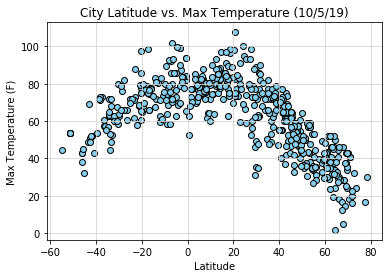

In [7]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (10/5/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("lat_v_temp.png")
plt.show()

#### Latitude vs. Humidity Plot

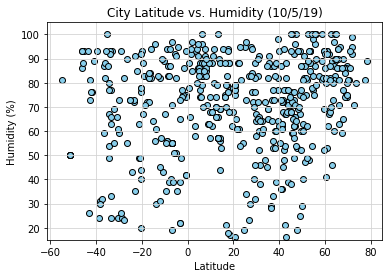

In [8]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (10/5/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("lat_v_hum.png")
plt.show()

#### Latitude vs. Cloudiness Plot

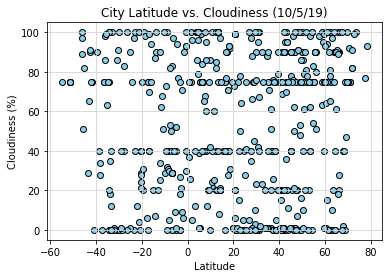

In [9]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (10/5/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("lat_v_cloud.png")
plt.show()

#### Latitude vs. Wind Speed Plot

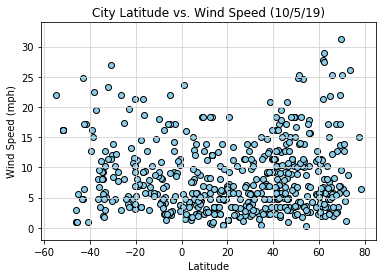

In [10]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (10/5/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("lat_v_wind.png")
plt.show()